# Data Cleaning & Pre-Processing

We've performed a basic EDA and gained some useful insights about the influence of various features on whether or not a person will default. Now its time to clean the data and perform some pre-processing so that we can develop models for predicting loan defaulters.

## Splitting the Dataset

#### IMPORTANT : Every pre-processing technique such as missing value handling, outlier removal, feature engineering, feature scaling all are fitted on the training dataset. So it is mandatory to split the dataset before performing any of these techniques.

## Transforming the Training Data (using fit_transform() method)

In [1]:
#Load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv('D:\Team Project\data\eda\credit_risk_explored.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [4]:
#Seperate features and target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [5]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Print the shapes of the resulting splits to verify
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (26059, 11), y_train: (26059,)
Test set shape: X_test: (6515, 11), y_test: (6515,)


In [7]:
#Checking the proportion of the target variable across training and test data.
y.value_counts(normalize=True)

0    0.78182
1    0.21818
Name: loan_status, dtype: float64

In [8]:
y_train.value_counts(normalize=True)

0    0.781611
1    0.218389
Name: loan_status, dtype: float64

In [9]:
y_test.value_counts(normalize=True)

0    0.782655
1    0.217345
Name: loan_status, dtype: float64

Here we see that after splitting, the proportion of the target variable is preserved in both training and test datsets.

In [10]:
#Checking for missing values in train data
(X_train.shape[0]-X_train.dropna().shape[0])/X_train.shape[0]*100

12.153190836179439

In [173]:
#There are 12% missing data in the train set

In [11]:
#Checking for missing values in train data
(X_test.shape[0]-X_test.dropna().shape[0])/X_test.shape[0]*100

11.895625479662318

In [12]:
#There are 12% missing data in the test set.

So the proportion missing values in training and test data is also preserved.

## 1. Handling Missing Values

In [13]:
X_train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              706
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2519
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Only person_emp_length and loan_int_rate columns have missing values in them.

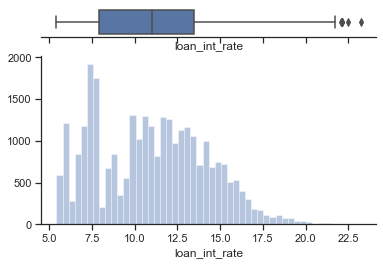

In [303]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['loan_int_rate'], ax=ax_box, orient= 'h' )
sns.distplot(df['loan_int_rate'], kde=False, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

+ The distribution of Loan Interest Rate is positively skewed and contains some outliers. 
+ As we know, in the case of a skewed distribution median is a more reliable measure central tendency as compared to mean. Hence we will replace the missing values in the column loan_in_rate with its median. 

In [15]:
#Median imputaion for skewed distribution
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train['loan_int_rate'] = imputer.fit_transform(X_train[['loan_int_rate']])

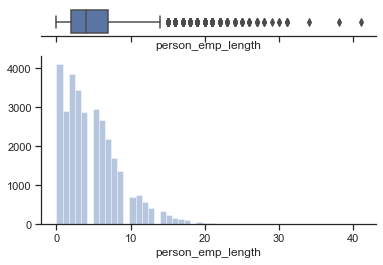

In [16]:
sns.set(style="ticks")


f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df['person_emp_length'], ax=ax_box, orient = 'h')
sns.distplot(df['person_emp_length'], kde=False, ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

Employment length of a person is also a highly skewed distribution so we will again perform median imputaion on this column as well.

In [17]:
#Median imputaion for skewed distribution
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train['person_emp_length'] = imputer.fit_transform(X_train[['person_emp_length']])

In [19]:
#No more missing values in the training dataset

In [18]:
X_train.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## 2. Encoding Categorical Variables

### One-hot Encoding and Label Encoding

+ For Nominal Categorical Variables we use one-hot-encoding
+ For Ordinal Categorical Variables we use label encoding

Here,
+ 'person_home_ownership', 'loan_intent', 'cb_person_default_on_file' are nominal categorical variables.
+ 'loan_grade' is ordinal categorical variable.

In [20]:
#Extract categorical columns from the dataframe
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

In [21]:
#Removing the ordinal variable loan_grade
categorical_columns.remove('loan_grade')

In [22]:
categorical_columns

['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

#### One-Hot-Encoding

In [23]:
from sklearn.preprocessing import OneHotEncoder

#Inititalize one-hot-encoder
ohe = OneHotEncoder(sparse=False)

#Apply one-hot-encoding to the categorical columns
ohe_encoded = ohe.fit_transform(X_train[categorical_columns])

#Create a DataFrame with one-hot-encoded columns
#We use get_feature_names() to get the column names for the encoded data
ohe_df = pd.DataFrame(ohe_encoded,
                     columns=ohe.get_feature_names(categorical_columns))

In [24]:
ohe_df.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [25]:
# Reset indices to ensure alignment
X_train.reset_index(drop=True, inplace=True)
ohe_df.reset_index(drop=True, inplace=True)

#Concatenate the one-hot-encoded dataframe with the original data-frame
X_train_encoded = pd.concat([X_train,ohe_df],axis=1)

# Drop the original categorical columns
X_train_encoded = X_train_encoded.drop(categorical_columns, axis=1)

In [26]:
#Display the resulting training dataset
X_train_encoded.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,23,100000,5.0,C,15000,11.34,0.15,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,27,130000,12.0,B,21000,10.99,0.16,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,27,45150,1.0,C,18000,13.16,0.40,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,22,28000,6.0,B,1000,10.25,0.04,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,22,55000,3.0,A,7000,6.91,0.13,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


#### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

#Initialize label encoder
le = LabelEncoder()

#Encode label in column 'loan_grade'
X_train_encoded['loan_grade'] = le.fit_transform(X_train_encoded['loan_grade'])

In [28]:
#Displaying which class got encoded to which numerical values
dict(zip(le.classes_,range(len(le.classes_))))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [29]:
X_train_encoded.head()

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,23,100000,5.0,2,15000,11.34,0.15,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,27,130000,12.0,1,21000,10.99,0.16,9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,27,45150,1.0,2,18000,13.16,0.40,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,22,28000,6.0,1,1000,10.25,0.04,4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,22,55000,3.0,0,7000,6.91,0.13,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
#Shape of the training data after encoding categorical variables
X_train_encoded.shape

(26059, 20)

## 3. Feature Scaling & Feature Transformation

**Feature Scaling** and **Feature Transformation** are applied to numerical features to standardize their scale. This process ensures that no single feature dominates others due to its larger value range.


In [31]:
#Extracting the numerical columns
numerical_cols = X_train.select_dtypes(include='number').columns.tolist()

In [32]:
numerical_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

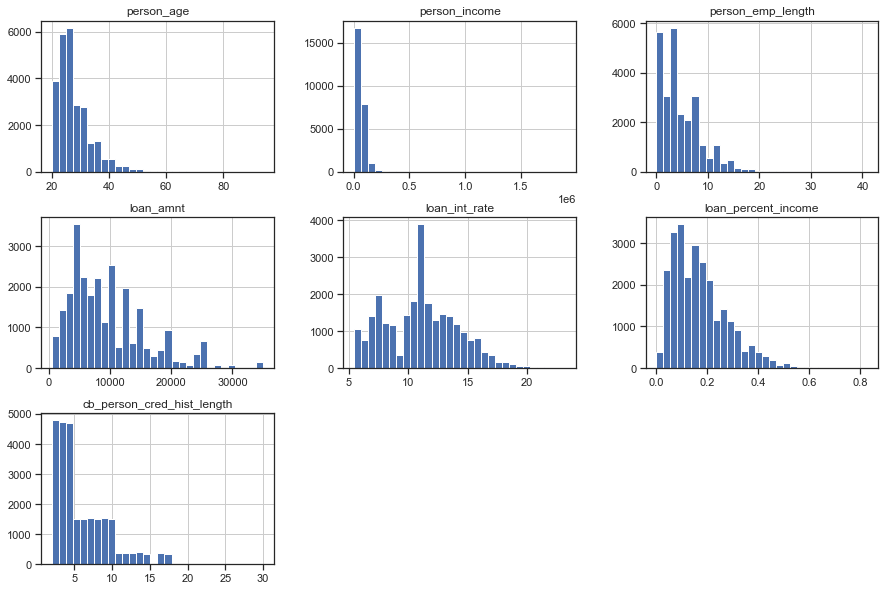

In [33]:
X_train.hist(bins=30, figsize=(15, 10))
plt.show()

#### The income column is highly skewed and contains many many outliers
Extreme outliers in the income column can distort statistical analysis and model performance. 

<AxesSubplot:xlabel='person_income'>

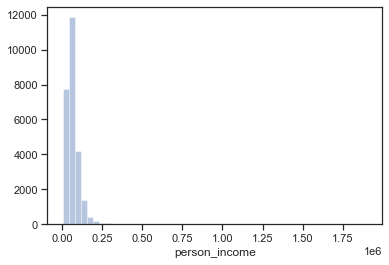

In [34]:
sns.distplot(X_train_encoded['person_income'],kde=False)

#### Performing log transformation on income column to make it more appropriate for standard scaling

In [35]:
X_train_encoded['log_income'] = np.log(X_train_encoded['person_income'])

<AxesSubplot:xlabel='log_income'>

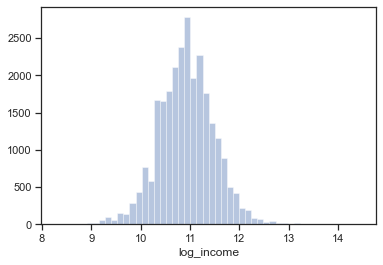

In [36]:
sns.distplot(X_train_encoded['log_income'],kde=False)

Now the income distribution is a bell shaped curve and will respond much more better to standard scaling method.
Some statistical models (e.g. Linear Regression, Logistic Regression) assumes normality of features so log transformation is essential in such situations to make the data more bell shaped (normal curve).

In [37]:
#Drop the original income column from training data
X_train_encoded = X_train_encoded.drop('person_income',axis=1)

#### Based on the shape of their distribution we will perform the following scaling methods
+ Standard scaling (Z-standardization) for log_income, loan_amnt, loan_int_rate, loan_percent_income
+ Min-max scaling for person_age,  person_emp_length, cb_person_cred_hist_length

In [38]:
num_cols1 = ['log_income','loan_amnt','loan_int_rate','loan_percent_income']
num_cols2 = ['person_age','person_emp_length','cb_person_cred_hist_length']

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Initialize standardscaler and min-max scaler
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

#Applying feature scaling methods to the respective columns
X_train_encoded[num_cols1] = pd.DataFrame(std_scaler.fit_transform(X_train_encoded[num_cols1]))
X_train_encoded[num_cols2] = pd.DataFrame(mm_scaler.fit_transform(X_train_encoded[num_cols2]))

In [40]:
#Renaming training dataset 
X_train_scaled = X_train_encoded

In [41]:
X_train_scaled

,person_age,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,log_income
0,0.040541,0.121951,2,0.850355,0.105479,-0.192213,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.039575
1,0.094595,0.292683,1,1.796568,-0.008377,-0.098697,0.250000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.503153
2,0.094595,0.024390,2,1.323462,0.697531,2.145675,0.178571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.365450
3,0.027027,0.146341,1,-1.357474,-0.249101,-1.220884,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.209662
4,0.027027,0.073171,0,-0.411262,-1.335614,-0.379244,0.071429,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.016759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26054,0.310811,0.292683,1,-0.253559,-0.333680,0.368880,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.624178
26055,0.054054,0.195122,0,-0.726666,-1.699954,-0.566275,0.035714,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.371330
26056,0.013514,0.146341,2,-1.042070,0.759339,-0.379244,0.035714,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.557235
26057,0.054054,0.073171,3,1.008057,0.538133,0.275365,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.627538


## Transforming the Test Data (using transform() method)

By fitting the preprocessing transoformers only on the training data and then using the fitted preprocessing transformers to transform the test data, we ensure that information from the test set does not influence the training process. 

#### Missing Value Handling

In [43]:
X_test.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             189
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                 596
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [44]:
#Applying median imputation to test data

X_test['loan_int_rate'] = imputer.transform(X_test[['loan_int_rate']])
X_test['person_emp_length'] = imputer.transform(X_test[['person_emp_length']])

In [45]:
X_test.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

#### One-Hot Encoding 

In [48]:
#Apply one-hot-encoding to the categorical columns of test data
ohe_test_encoded = ohe.transform(X_test[categorical_columns])

#Create a DataFrame with one-hot-encoded columns
#We use get_feature_names() to get the column names for the encoded data
ohe_test_df = pd.DataFrame(ohe_test_encoded,
                     columns=ohe.get_feature_names(categorical_columns))

In [50]:
ohe_test_df.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Reset indices to ensure alignment
X_test.reset_index(drop=True, inplace=True)
ohe_test_df.reset_index(drop=True, inplace=True)

#Concatenate the one-hot-encoded dataframe with the original data-frame
X_test_encoded = pd.concat([X_test,ohe_test_df],axis=1)

# Drop the original categorical columns
X_test_encoded = X_test_encoded.drop(categorical_columns, axis=1)

#### Label Encoding

In [57]:
#Encode label in column 'loan_grade' for test data
X_test_encoded['loan_grade'] = le.transform(X_test_encoded['loan_grade'])

#### Feature Scaling & Transformation

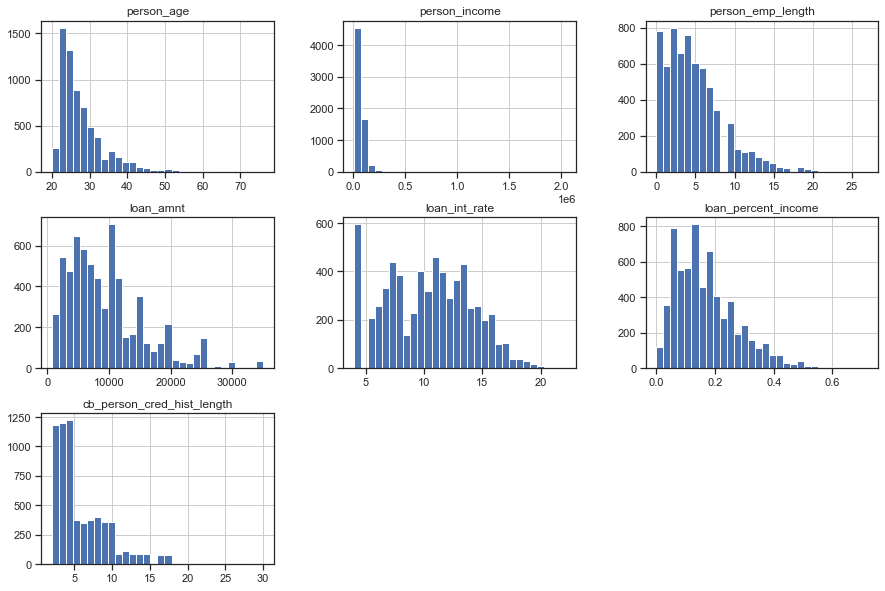

In [59]:
X_test.hist(bins=30, figsize=(15, 10))
plt.show()

In [61]:
#Log transofrmation for person_income in test data
X_test_encoded['log_income'] = np.log(X_test_encoded['person_income'])

In [63]:
#Drop the original income column from test data
X_test_encoded = X_test_encoded.drop('person_income',axis=1)

In [64]:
#Applying feature scaling methods to the respective columns of test data

X_test_encoded[num_cols1] = pd.DataFrame(std_scaler.transform(X_test_encoded[num_cols1]))
X_test_encoded[num_cols2] = pd.DataFrame(mm_scaler.transform(X_test_encoded[num_cols2]))

In [65]:
#Renaming test dataset 
X_test_scaled = X_test_encoded

In [66]:
# Print the shapes of the preprocessed data to verify
print(f"Training set shape: X_train: {X_train_scaled.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test_scaled.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (26059, 20), y_train: (26059,)
Test set shape: X_test: (6515, 20), y_test: (6515,)


In [71]:
#Exporting the final training & test dataset

X_train_scaled.to_csv('X_train.csv',index=False)
X_test_scaled.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)